In [1]:
# Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 2000)
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.manifold import TSNE
from scipy import spatial

2023-11-19 18:58:32.542480: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-19 18:58:32.542617: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-19 18:58:32.543091: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [2]:
# Import embedding
path = r'data/final_trimmed_snomed_embedding_128d.csv'
trimmed_snomed_embedding = pd.read_csv(path, index_col=0)

In [3]:
# Import snomed distance
path = r'data/international_snomed_distance.csv'
snomed_distance = pd.read_csv(path, index_col=0)
# Convert to str
snomed_distance.index = snomed_distance.index.astype(str)

In [4]:
trimmed_snomed_embedding

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
snomed_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
95324001,0.218880,-0.143242,0.279311,0.122627,-0.247978,-0.041680,0.252752,0.305453,-0.187868,0.350855,-0.028540,-0.283773,-0.395628,-0.010063,-0.253516,0.414326,0.055230,-0.440950,-0.298523,-0.236918,...,0.078870,-0.267850,-0.299966,0.246021,-0.057050,-0.510570,-0.075517,-0.067583,0.034248,-0.302752,0.094081,-0.303411,-0.041270,-0.164550,-0.028589,-0.074428,-0.130048,-0.148800,0.120522,-0.115371
81308009,-0.022543,0.034095,0.152589,-0.321631,-0.032552,0.227740,-0.077939,0.033574,0.048695,0.061036,-0.095946,-0.059924,-0.064917,-0.228700,-0.061442,0.155336,0.308956,0.054191,0.194345,-0.305732,...,-0.033207,0.008570,-0.189741,-0.253014,0.105711,0.039153,-0.122667,-0.007193,-0.028763,-0.051796,-0.115747,-0.054356,0.300723,-0.184051,-0.317587,-0.205256,0.051937,-0.077652,-0.453418,0.019214
363346000,-0.145293,0.198760,-0.011546,0.151815,-0.030025,0.155092,-0.119732,0.113912,-0.276302,0.127577,-0.432746,-0.157746,-0.271030,-0.390089,0.026623,0.204385,0.261260,0.187057,-0.213311,0.139741,...,0.191860,-0.326315,0.375689,-0.010472,0.388979,0.231447,-0.260248,0.043332,-0.195634,0.147868,0.278115,-0.127111,-0.190594,0.229352,-0.342326,0.174672,-0.153871,-0.213271,-0.303664,0.040939
64572001,-0.180752,0.065206,-0.033927,0.204637,-0.245122,0.086504,0.050831,-0.219228,-0.245577,-0.094911,0.061955,0.153709,0.215076,-0.088541,0.073527,0.028058,-0.024002,-0.169893,-0.170116,-0.279955,...,-0.067309,-0.052580,0.081515,0.080465,0.067147,-0.071376,0.017434,-0.050212,-0.064280,0.052706,0.134357,-0.063557,0.091572,0.136254,0.101521,-0.348531,-0.206637,0.165889,0.051839,-0.063793
128139000,0.170894,-0.121695,-0.101853,0.234205,-0.062576,0.194582,0.084485,-0.017592,0.226110,0.076484,-0.020925,-0.071149,0.091347,-0.002795,-0.142389,0.136991,0.159216,0.070433,0.093725,0.036001,...,-0.111051,0.159133,-0.245961,0.067101,0.005645,-0.124323,-0.358705,0.158840,0.176676,-0.141905,-0.053981,0.173552,0.387943,0.209794,0.016916,0.281639,-0.288956,0.034734,0.124148,-0.071868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414173003,0.328236,0.036208,-0.518049,-0.191841,0.232803,0.034512,-0.028654,-0.055711,-0.147230,-0.164026,0.203599,0.059382,0.036318,-0.054405,-0.289768,0.333492,0.246487,0.034020,0.291017,0.091053,...,-0.301622,0.102560,-0.224856,-0.163703,0.057657,-0.197870,-0.083812,-0.221851,-0.281258,-0.161922,-0.003623,0.104708,-0.318097,-0.195693,0.170051,0.137014,-0.018964,-0.381049,-0.378388,0.002424
16402000,-0.008512,-0.519395,-0.454137,0.221085,-0.212944,0.337702,-0.114009,0.050662,0.066568,-0.027212,0.018038,0.007249,0.328085,0.102455,-0.357802,0.138796,0.178324,-0.277072,0.131909,-0.192777,...,-0.196264,-0.145857,0.077847,0.031635,0.207262,-0.039875,-0.152718,0.047528,0.185640,0.453216,-0.014212,-0.261410,-0.076888,0.079155,0.231808,-0.297733,-0.246125,0.134378,-0.068948,0.311895
72366004,0.170411,0.117433,-0.194381,0.091406,-0.164469,-0.076155,0.013070,0.040411,0.133094,0.031991,-0.485661,-0.067446,-0.099734,0.059201,0.160592,0.013532,-0.043153,0.018084,0.150120,-0.326671,...,-0.279131,-0.048034,0.184019,-0.174622,0.041720,-0.179223,-0.051742,-0.113008,0.068055,-0.130766,-0.140571,-0.064658,0.170216,-0.069438,-0.168434,-0.107515,-0.134968,-0.175954,0.034550,0.105758


In [4]:
# Get node ids
trimmed_node_ids = trimmed_snomed_embedding.index.astype(str).to_list()

In [5]:
print('Working out distances')

# Get closest point for each point
distance,index = spatial.KDTree(trimmed_snomed_embedding).query(trimmed_snomed_embedding, k=2)
# Filter for slice to exsclude self
index = index[:,1]
# Get snomed distance for each clostest pair
distance_list = []
for n in range(len(index)):
    distance = snomed_distance.loc[trimmed_node_ids[index[n]], trimmed_node_ids[n]]
    distance_list.append(distance)
distance_arr = np.array(distance_list)

# Get mean for metric
mean_snomed_distance_metric = distance_arr.mean()

print('mean_snomed_distance_metric:', mean_snomed_distance_metric)

Working out distances
mean_snomed_distance_metric: 1.2339428035630566


/home/wb1115/anaconda3/envs/multimorbid/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wb1115/anaconda3/envs/multimorbid/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

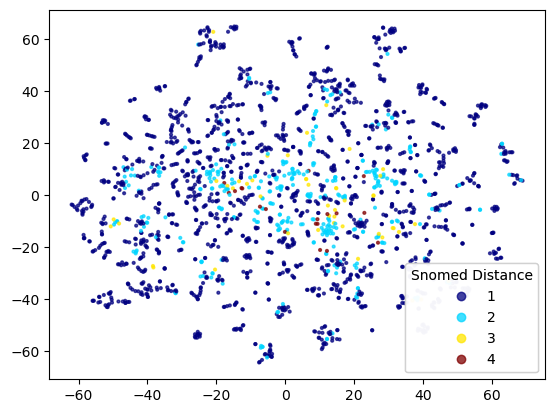

In [121]:
# TSNE
tsne = TSNE(n_components=2, random_state=0)
weighted_node_embeddings_2d = tsne.fit_transform(trimmed_snomed_embedding)
# draw the points
alpha = 0.7

plt.figure(figsize=(10, 8))
fig, ax = plt.subplots()
scatter = ax.scatter(
    weighted_node_embeddings_2d[:, 0],
    weighted_node_embeddings_2d[:, 1],
    c=distance_arr,
    cmap="jet",
    alpha=0.7,
    s=4
)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Snomed Distance")
ax.add_artist(legend1)
plt.show()

In [7]:
# -----------------------------
# Import
# -----------------------------

path = r'data/International/Relationship.txt'
international_relationship = pd.read_csv(path, delimiter="\t")

path = r'data/International/Description.txt'
international_description = pd.read_csv(path, delimiter="\t")

# Filter for disorder in brackets 
description2 = international_description[international_description['term'].str.contains("\(disorder\)")==True]

# Get list of conceptIDs
conceptIDs = description2.conceptId.values.tolist()

# Filter relationship by disorder conceptIDs
relationship2 = international_relationship[(international_relationship['sourceId'].isin(conceptIDs)) & (international_relationship['destinationId'].isin(conceptIDs))]

# Filter relationship by 'is a' relationships
relationship2 = relationship2[relationship2['typeId'] == 116680003]

# Generate df for working out distances using codes
relationship2_2 = relationship2.copy()
relationship2_2.drop_duplicates(subset=['active', 'moduleId', 'sourceId', 'destinationId', \
                                      'relationshipGroup', 'typeId', 'characteristicTypeId', 'modifierId'], inplace=True)
relationship2_2 = relationship2_2[relationship2_2['active']==1]

# Create graph
id_disorder_graph = nx.from_pandas_edgelist(relationship2_2, source='sourceId', target='destinationId', create_using=nx.DiGraph)

In [123]:
nx.info(id_disorder_graph)
nx.is_directed(id_disorder_graph)

'DiGraph with 107733 nodes and 342784 edges'

True

In [8]:
def recursion_fun(graph, list, n, flag, exsplored_list, child_list):
    n += 1
    #print('len', len(list))
    #print(n)
    for x in list:
        if x in exsplored_list:
            continue
        #print('x:', x)
        #if flag == True:
            #print('First parents')
        predecessors2 = [pred for pred in graph.predecessors(x)]
        exsplored_list.append(x)
        #print('parents:', predecessors2)
        child_list = child_list + predecessors2
        if len(predecessors2) > 0:
            child_list = recursion_fun(id_disorder_graph, predecessors2, n, False, exsplored_list, child_list)
            child_list = child_list + predecessors2
        
    return child_list

In [11]:
def get_child_array(code):
    
    # Find all children for particular node 
    predecessors = [pred for pred in id_disorder_graph.predecessors(code)]
    specific_codes_children = []
    specific_codes_children = specific_codes_children + predecessors
    exsplored_list = []
    child_list = []
    specific_codes_children2 = recursion_fun(id_disorder_graph, predecessors, 0, True, exsplored_list, child_list)
    specific_codes_children = specific_codes_children + specific_codes_children2
    specific_codes_children = list(set(specific_codes_children))
    specific_codes_children = [str(x) for x in specific_codes_children]
    children = list(set(specific_codes_children) & set(trimmed_node_ids))
    print('Number of children:', len(children))

    return children

In [12]:
# Create column with disease
disease_df = trimmed_snomed_embedding.reset_index()
disease_df["snomed_code"] = disease_df["snomed_code"].astype(str)

# 40733004 - Infectious disease
children = get_child_array(40733004)
disease_df['disease'] = np.where(disease_df["snomed_code"].isin(children), 'Infectious disease - other', 'Other')
disease_df = disease_df[['snomed_code', 'disease']]

# 34014006 - Viral infectious disease
children = get_child_array(34014006)
disease_df['disease'] = np.where(disease_df["snomed_code"].isin(children), 'Infectious disease - viral', disease_df['disease'])
disease_df = disease_df[['snomed_code', 'disease']]

# 87628006 - Bacterial infectious disease
children = get_child_array(87628006)
disease_df['disease'] = np.where(disease_df["snomed_code"].isin(children), 'Infectious disease - bacterial', disease_df['disease'])
disease_df = disease_df[['snomed_code', 'disease']]

# 56265001 - Heart disease
children = get_child_array(56265001)
disease_df['disease'] = np.where(disease_df["snomed_code"].isin(children), 'Heart disease', disease_df['disease'])
disease_df = disease_df[['snomed_code', 'disease']]

# 38341003 - Hypertensive disorder, systemic arterial
children = get_child_array(38341003)
disease_df['disease'] = np.where(disease_df["snomed_code"].isin(children), 'Hypertensive disorder', disease_df['disease'])
disease_df = disease_df[['snomed_code', 'disease']]

# 363346000 - Malignant neoplastic disease
children = get_child_array(363346000)
disease_df['disease'] = np.where(disease_df["snomed_code"].isin(children), 'Malignant neoplastic disease', disease_df['disease'])
disease_df = disease_df[['snomed_code', 'disease']]

# 73211009 - Diabetes
children = get_child_array(73211009)
disease_df['disease'] = np.where(disease_df["snomed_code"].isin(children), 'Diabetes', disease_df['disease'])
disease_df = disease_df[['snomed_code', 'disease']]

# 3723001 - Arthritis
children = get_child_array(3723001)
disease_df['disease'] = np.where(disease_df["snomed_code"].isin(children), 'Arthritis', disease_df['disease'])
disease_df = disease_df[['snomed_code', 'disease']]

# 74732009 - Mental disorder
children = get_child_array(74732009)
disease_df['disease'] = np.where(disease_df["snomed_code"].isin(children), 'Mental disorder', disease_df['disease'])
disease_df = disease_df[['snomed_code', 'disease']]

# 414029004 - Disorder of immune function
children = get_child_array(414029004)
disease_df['disease'] = np.where(disease_df["snomed_code"].isin(children), 'Disorder of immune function', disease_df['disease'])
disease_df = disease_df[['snomed_code', 'disease']]

# 782964007 - Genetic disease 
children = get_child_array(782964007)
disease_df['disease'] = np.where(disease_df["snomed_code"].isin(children), 'Genetic disease', disease_df['disease'])
disease_df = disease_df[['snomed_code', 'disease']]

# Add x and y
disease_df['X'] = weighted_node_embeddings_2d[:, 0]
disease_df['Y'] = weighted_node_embeddings_2d[:, 1]

Number of children: 246
Number of children: 76
Number of children: 48
Number of children: 100
Number of children: 16
Number of children: 90
Number of children: 53
Number of children: 111
Number of children: 66
Number of children: 214
Number of children: 55


In [15]:
disease_df.disease.value_counts()

Other                             1276
Disorder of immune function        209
Infectious disease - other          97
Heart disease                       96
Arthritis                           95
Cancer                              73
Infectious disease - viral          73
Mental disorder                     64
Genetic disease                     55
Diabetes                            46
Infectious disease - bacterial      33
Hypertensive disorder               16
Name: disease, dtype: int64

## Plot

<Figure size 1200x900 with 0 Axes>

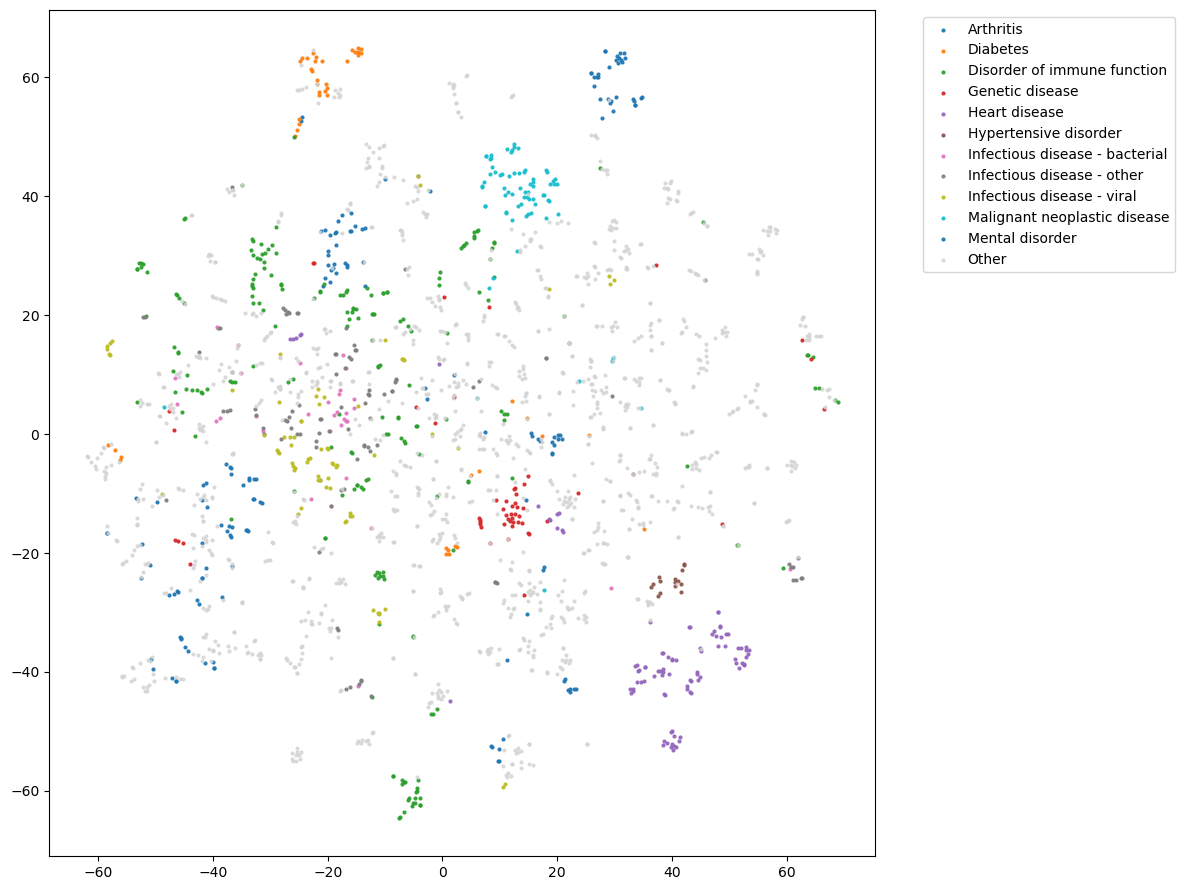

In [18]:
# Plot data by category
plt.figure(figsize=(12, 9))
groups = disease_df.groupby("disease")
for name, group in groups:
    if name == 'Other':
        plt.scatter(group["X"], group["Y"], alpha=0.75, s=4, label=name, c='lightgrey')
    else:
        plt.scatter(group["X"], group["Y"], alpha=0.9, s=4, label=name)

#plt.legend(bbox_to_anchor =(0.5,-0.27), loc='lower center')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

Text(0.5, 0, 't-SNE dimension 1')

Text(0.5, 0, 't-SNE dimension 1')

Text(0, 0.5, 't-SNE dimension 2')

Text(0.5, 1.0, 't-SNE visualisation with SNOMED distance')

Text(0.5, 1.0, 't-SNE visualisation with disorder groups')

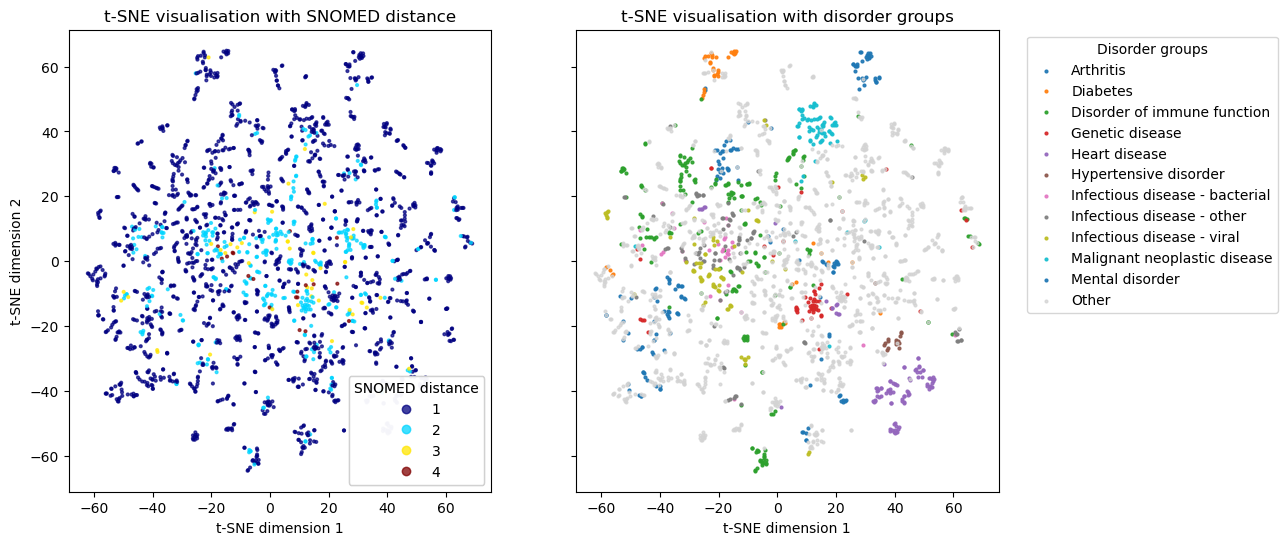

In [28]:
fig, ax = plt.subplots(1, 2, sharey=True)
scatter = ax[0].scatter(
    weighted_node_embeddings_2d[:, 0],
    weighted_node_embeddings_2d[:, 1],
    c=distance_arr,
    cmap="jet",
    alpha=0.7,
    s=4
)
legend1 = ax[0].legend(*scatter.legend_elements(),
                    loc="lower right", title="SNOMED distance")
ax[0].add_artist(legend1)

# Plot data by category
#plt.figure(figsize=(12, 9))
groups = disease_df.groupby("disease")
for name, group in groups:
    if name == 'Other':
        ax[1].scatter(group["X"], group["Y"], alpha=0.75, s=4, label=name, c='lightgrey')
    else:
        ax[1].scatter(group["X"], group["Y"], alpha=0.9, s=4, label=name)

#plt.legend(bbox_to_anchor =(0.5,-0.27), loc='lower center')
ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='best', title="Disorder groups")

ax[0].set_xlabel('t-SNE dimension 1')
ax[1].set_xlabel('t-SNE dimension 1')
ax[0].set_ylabel('t-SNE dimension 2')

ax[0].set_title('t-SNE visualisation with SNOMED distance')
ax[1].set_title('t-SNE visualisation with disorder groups')

fig.set_figheight(6)
fig.set_figwidth(12)
plt.show()